In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from datetime import datetime
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 100 

import matplotlib.font_manager as fm
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif':['Computer Modern Roman'],
    #'mathtext.fontset': 'cm',
    'font.size': 11,
    'svg.fonttype': 'none'
})

In [ ]:
## data paths
card_delay_sequence_1 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\JPACardDelay_IQ_4kpoints_fullPulse_sequence_1_carddelay_0.0s_awgdelay_0s_20250730_152606.pkl"
card_delay_sequence_2 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\JPACardDelay_IQ_4kpoints_fullPulse_sequence_2_carddelay_5.555555555555555e-09s_awgdelay_0s_20250730_152614.pkl"
card_delay_sequence_3 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\JPACardDelay_IQ_4kpoints_fullPulse_sequence_3_carddelay_1.111111111111111e-08s_awgdelay_0s_20250730_152622.pkl"
card_delay_sequence_4 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\JPACardDelay_IQ_4kpoints_fullPulse_sequence_4_carddelay_1.6666666666666664e-08s_awgdelay_0s_20250730_152630.pkl"
card_delay_sequence_5 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\JPACardDelay_IQ_4kpoints_fullPulse_sequence_5_carddelay_2.222222222222222e-08s_awgdelay_0s_20250730_152639.pkl"
card_delay_sequence_6 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\JPACardDelay_IQ_4kpoints_fullPulse_sequence_6_carddelay_2.7777777777777777e-08s_awgdelay_0s_20250730_152647.pkl"
card_delay_sequence_7 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\JPACardDelay_IQ_4kpoints_fullPulse_sequence_7_carddelay_3.333333333333333e-08s_awgdelay_0s_20250730_152655.pkl"
card_delay_sequence_8 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\JPACardDelay_IQ_4kpoints_fullPulse_sequence_8_carddelay_3.8888888888888884e-08s_awgdelay_0s_20250730_152703.pkl"
card_delay_sequence_9 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\JPACardDelay_IQ_4kpoints_fullPulse_sequence_9_carddelay_4.444444444444444e-08s_awgdelay_0s_20250730_152711.pkl"
card_delay_sequence_10 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\JPACardDelay_IQ_4kpoints_fullPulse_sequence_10_carddelay_5e-08s_awgdelay_0s_20250730_152720.pkl"

delay_list = [card_delay_sequence_1, card_delay_sequence_2, card_delay_sequence_3, card_delay_sequence_4, card_delay_sequence_5, 
              card_delay_sequence_6, card_delay_sequence_7, card_delay_sequence_8, card_delay_sequence_9, card_delay_sequence_10]
full_I_carr_g, full_I_carr_e, full_Q_carr_g, full_Q_carr_e = [[] for _ in range(4)]
full_I_usb_g, full_I_usb_e, full_Q_usb_g, full_Q_usb_e = [[] for _ in range(4)]
full_I_lsb_g, full_I_lsb_e, full_Q_lsb_g, full_Q_lsb_e = [[] for _ in range(4)]

def get_full_array(key):
    for pathind in range(len(delay_list)):
        sq_data = pickle.load(open(delay_list[pathind], 'rb'))

        if pathind == 0:
            output = sq_data['Data']['IQdat'][key][0, 0, :]
        else:
            temp = sq_data['Data']['IQdat'][key][0, 0, :]
            output = np.concatenate((output, temp))
    return output

full_I_carr_g = get_full_array('I_carrier_g')
full_I_carr_e = get_full_array('I_carrier_e')
full_Q_carr_g = get_full_array('Q_carrier_g')
full_Q_carr_e = get_full_array('Q_carrier_e')

full_I_lsb_g = get_full_array('I_lsb_g')
full_I_lsb_e = get_full_array('I_lsb_e')
full_Q_lsb_g = get_full_array('Q_lsb_g')
full_Q_lsb_e = get_full_array('Q_lsb_e')

full_I_usb_g = get_full_array('I_usb_g')
full_I_usb_e = get_full_array('I_usb_e')
full_Q_usb_g = get_full_array('Q_usb_g')
full_Q_usb_e = get_full_array('Q_usb_e')



# for pathind in range(len(delay_list)):
#     sq_data = pickle.load(open(delay_list[pathind], 'rb'))
#     I_carr_g, I_carr_e = sq_data['Data']['IQdat']['I_carrier_g'][0, 0, :],  sq_data['Data']['IQdat']['I_carrier_e'][0, 0, :]
#     Q_carr_g, Q_carr_e = sq_data['Data']['IQdat']['Q_carrier_g'][0, 0, :],  sq_data['Data']['IQdat']['Q_carrier_e'][0, 0, :]

#     I_usb_g, I_usb_e = sq_data['Data']['IQdat']['I_usb_g'][0, 0, :], sq_data['Data']['IQdat']['I_usb_e'][0, 0, :]
#     Q_usb_g, Q_usb_e = sq_data['Data']['IQdat']['Q_usb_g'][0, 0, :], sq_data['Data']['IQdat']['Q_usb_e'][0, 0, :]

#     I_lsb_g, I_lsb_e = sq_data['Data']['IQdat']['I_lsb_g'][0, 0, :], sq_data['Data']['IQdat']['I_lsb_e'][0, 0, :]
#     Q_lsb_g, Q_lsb_e = sq_data['Data']['IQdat']['Q_lsb_g'][0, 0, :], sq_data['Data']['IQdat']['Q_lsb_e'][0, 0, :]

#     full_I_carr_g.append(I_carr_g)
#     full_I_carr_e.append(I_carr_e)
#     full_Q_carr_g.append(Q_carr_g)
#     full_Q_carr_e.append(Q_carr_e)


#     full_I_usb_g.append(I_usb_g)
#     full_I_usb_e.append(I_usb_e)
#     full_Q_usb_g.append(Q_usb_g)
#     full_Q_usb_e.append(Q_usb_e)

#     full_I_lsb_g.append(I_lsb_g)
#     full_I_lsb_e.append(I_lsb_e)
#     full_Q_lsb_g.append(Q_lsb_g)
#     full_Q_lsb_e.append(Q_lsb_e)

# full_I_carr_g, full_I_carr_e, full_Q_carr_g, full_Q_carr_e = np.array(full_I_carr_g), np.array(full_I_carr_e), np.array(full_Q_carr_g), np.array(full_Q_carr_e)
# full_I_usb_g, full_I_usb_e, full_Q_usb_g, full_Q_usb_e = np.array(full_I_usb_g), np.array(full_I_usb_e), np.array(full_Q_usb_g), np.array(full_Q_usb_e)
# full_I_lsb_g, full_I_lsb_e, full_Q_lsb_g, full_Q_lsb_e = np.array(full_I_lsb_g), np.array(full_I_lsb_e), np.array(full_Q_lsb_g), np.array(full_Q_lsb_e)



In [47]:
## data paths

card_delay_sequence_1 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\CardDelay_32nsSteps_1_20250730_182524.pkl"
card_delay_sequence_2 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\CardDelay_32nsSteps_2_20250730_182533.pkl"
card_delay_sequence_3 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\CardDelay_32nsSteps_3_20250730_182541.pkl"
card_delay_sequence_4 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\CardDelay_32nsSteps_4_20250730_182550.pkl"
card_delay_sequence_5 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\CardDelay_32nsSteps_5_20250730_182558.pkl"
card_delay_sequence_6 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\CardDelay_32nsSteps_6_20250730_182607.pkl"
card_delay_sequence_7 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\CardDelay_32nsSteps_7_20250730_182616.pkl"
card_delay_sequence_8 = r"K:\Data\Oxford\PDH\PDH_v5\PDH_TripleDDC_manualDelays\20250730\CardDelay_32nsSteps_0_20250730_182516.pkl"

delay_list = [card_delay_sequence_1, card_delay_sequence_2, card_delay_sequence_3, card_delay_sequence_4, card_delay_sequence_5, 
              card_delay_sequence_6, card_delay_sequence_7, card_delay_sequence_8, card_delay_sequence_9, card_delay_sequence_10]
full_I_carr_g, full_I_carr_e, full_Q_carr_g, full_Q_carr_e = [[] for _ in range(4)]
full_I_usb_g, full_I_usb_e, full_Q_usb_g, full_Q_usb_e = [[] for _ in range(4)]
full_I_lsb_g, full_I_lsb_e, full_Q_lsb_g, full_Q_lsb_e = [[] for _ in range(4)]

def get_full_array(key):
    for pathind in range(len(delay_list)):
        sq_data = pickle.load(open(delay_list[pathind], 'rb'))

        if pathind == 0:
            output = sq_data['Data']['IQdat'][key][0, 0, :]
        else:
            temp = sq_data['Data']['IQdat'][key][0, 0, :]
            output = np.concatenate((output, temp))
    return output

full_I_carr_g = get_full_array('I_carrier_g')
full_I_carr_e = get_full_array('I_carrier_e')
full_Q_carr_g = get_full_array('Q_carrier_g')
full_Q_carr_e = get_full_array('Q_carrier_e')

full_I_lsb_g = get_full_array('I_lsb_g')
full_I_lsb_e = get_full_array('I_lsb_e')
full_Q_lsb_g = get_full_array('Q_lsb_g')
full_Q_lsb_e = get_full_array('Q_lsb_e')

full_I_usb_g = get_full_array('I_usb_g')
full_I_usb_e = get_full_array('I_usb_e')
full_Q_usb_g = get_full_array('Q_usb_g')
full_Q_usb_e = get_full_array('Q_usb_e')


def compute_PDH_from_IQ(I_lsb,Q_lsb, I_carr, Q_carr, I_usb, Q_usb):
    pdhI = I_carr*I_usb + I_carr*I_lsb + Q_carr*Q_usb + Q_carr*Q_lsb
    pdhQ = -I_carr*Q_usb + Q_carr*I_usb + I_carr*Q_lsb - Q_carr*I_lsb
    return pdhI, pdhQ

pdhI_g, pdhQ_g = compute_PDH_from_IQ(full_I_lsb_g,full_Q_lsb_g,
                                      full_I_carr_g, full_Q_carr_g,
                                        full_I_usb_g, full_Q_usb_g)
pdhI_e, pdhQ_e = compute_PDH_from_IQ(full_I_lsb_e,full_Q_lsb_e,
                                      full_I_carr_e, full_Q_carr_e,
                                        full_I_usb_e, full_Q_usb_e)

phi_0_g = np.angle(full_I_carr_g +  1j*full_Q_carr_g)
phi_0_e = np.angle(full_I_carr_e +  1j*full_Q_carr_e)

phi_minus_g = np.angle(full_I_lsb_g +  1j*full_Q_lsb_g)
phi_minus_e = np.angle(full_I_lsb_e +  1j*full_Q_lsb_e)

phi_plus_g = np.angle(full_I_usb_g +  1j*full_Q_usb_g)
phi_plus_e = np.angle(full_I_usb_e +  1j*full_Q_usb_e)

ddphi_g = 2*phi_0_g - (phi_minus_g + phi_plus_g)
ddphi_e = 2*phi_0_e - (phi_minus_e + phi_plus_e)


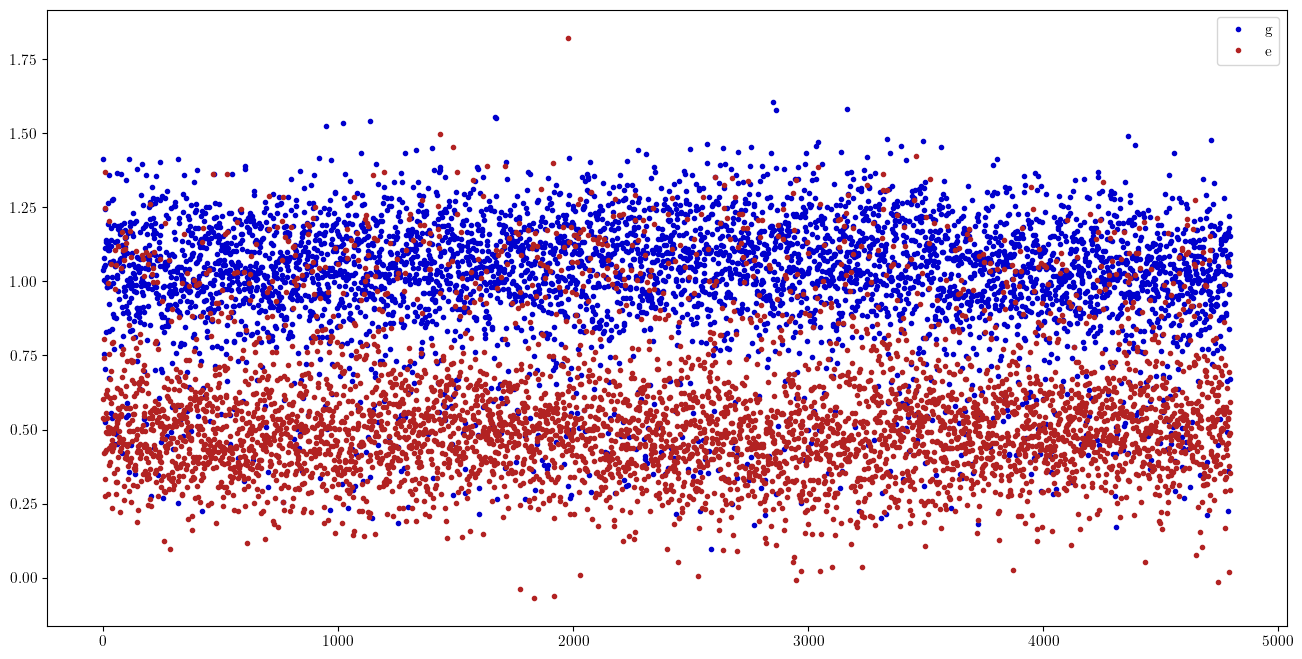

In [89]:
def unwrap_phase_AK(phases, offset = 0):
    output = np.zeros(len(phases))
    for ind in range(0, len(phases)):
        phase = phases[ind] + offset
        temp1 = phase
        temp2 = phase + 2*np.pi
        temp3 = phase -2*np.pi
        temp4 = phase + 4*np.pi
        temp5 = phase -4*np.pi

        vec = [temp1, temp2, temp3,temp4, temp5]
        ind2 = np.argmin(np.abs(vec))

        output[ind] = vec[ind2]-offset
    return output




input = ddphi_g
new_phases_g =  unwrap_phase_AK(input, offset = 1*np.pi) + 2*np.pi

input = ddphi_e
new_phases_e =  unwrap_phase_AK(input, offset = -0.9*np.pi)


fig = plt.figure()
plt.clf()
ax = plt.subplot(1,1,1)
plt.plot(new_phases_g/np.pi, color = gcolor, linestyle = '', marker = '.', label = 'g')
plt.plot(new_phases_e/np.pi, color = ecolor, linestyle = '', marker = '.', label = 'e')
ax.legend()

fig.set_size_inches([16,8])
plt.show()




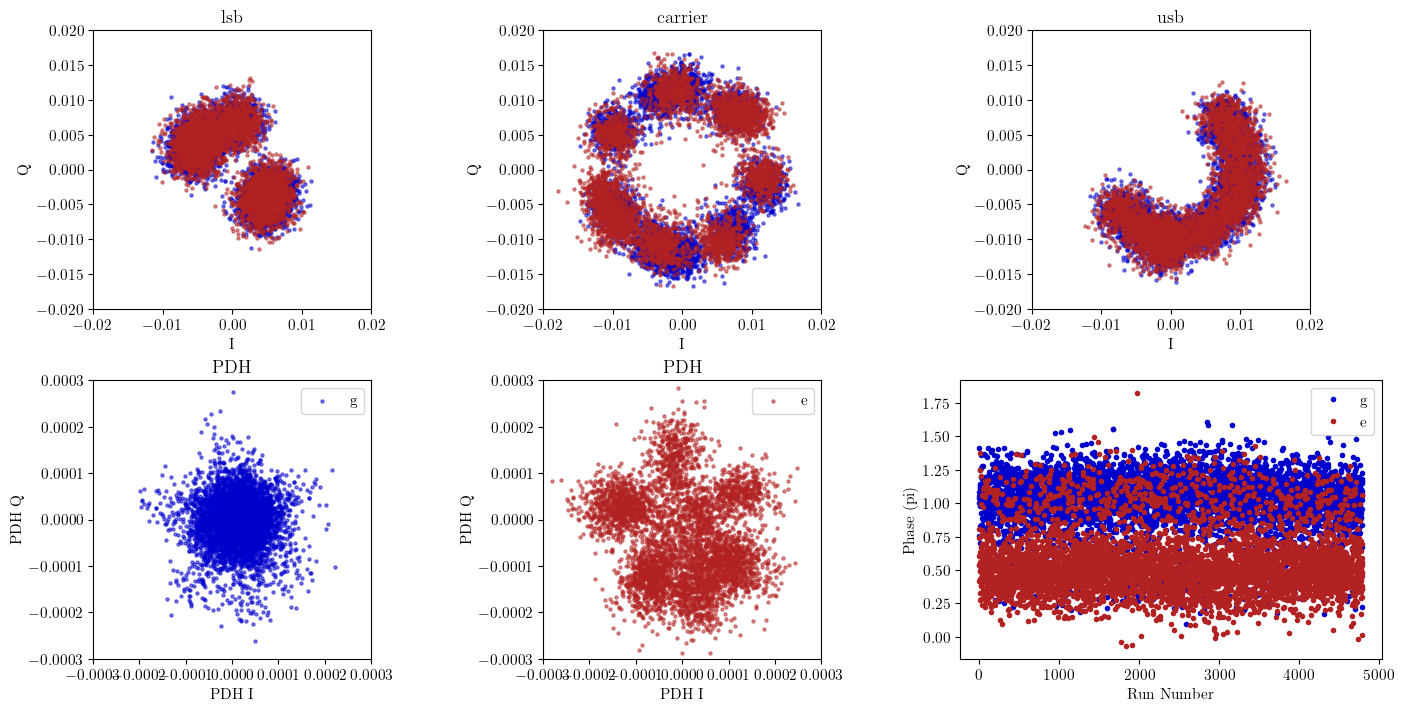

In [ ]:
fig = plt.figure(7, constrained_layout = True)
plt.clf()

gcolor = 'mediumblue'
ecolor = 'firebrick'
alpha_val = 0.5

ax = plt.subplot(2,3,1)
plt.scatter(full_I_lsb_g, full_Q_lsb_g, color = gcolor, label = 'g', s = 5, alpha = alpha_val)
plt.scatter(full_I_lsb_e, full_Q_lsb_e, color = ecolor, label = 'e', s = 5, alpha = alpha_val)
plt.xlabel('I')
plt.ylabel('Q')
ax.set_aspect('equal')
ax.set_xlim([-0.02, 0.02])
ax.set_ylim([-0.02, 0.02])
plt.title('lsb')


ax = plt.subplot(2,3,2)
plt.scatter(full_I_carr_g, full_Q_carr_g, color = gcolor, label = 'g', s = 5, alpha = alpha_val)
plt.scatter(full_I_carr_e, full_Q_carr_e, color = ecolor, label = 'e', s = 5, alpha = alpha_val)
plt.xlabel('I')
plt.ylabel('Q')
ax.set_aspect('equal')
ax.set_xlim([-0.02, 0.02])
ax.set_ylim([-0.02, 0.02])
plt.title('carrier')

ax = plt.subplot(2,3,3)
plt.scatter(full_I_usb_g, full_Q_usb_g, color = gcolor, label = 'g', s = 5, alpha = alpha_val)
plt.scatter(full_I_usb_e, full_Q_usb_e, color = ecolor, label = 'e', s = 5, alpha = alpha_val)
plt.xlabel('I')
plt.ylabel('Q')
ax.set_aspect('equal')
ax.set_xlim([-0.02, 0.02])
ax.set_ylim([-0.02, 0.02])
plt.title('usb')



ax = plt.subplot(2,3,4)
plt.scatter(pdhI_g, pdhQ_g, color = gcolor, label = 'g', s = 5, alpha = alpha_val)
# plt.scatter(pdhI_e, pdhQ_e, color = ecolor, label = 'e', s = 5, alpha = alpha_val)
plt.xlabel('PDH I')
plt.ylabel('PDH Q')
ax.set_aspect('equal')
ax.set_xlim([-0.0003, 0.0003])
ax.set_ylim([-0.0003, 0.0003])
plt.title('PDH')
ax.legend()

ax = plt.subplot(2,3,5)
# plt.scatter(pdhI_g, pdhQ_g, color = gcolor, label = 'g', s = 5, alpha = alpha_val)
plt.scatter(pdhI_e, pdhQ_e, color = ecolor, label = 'e', s = 5, alpha = alpha_val)
plt.xlabel('PDH I')
plt.ylabel('PDH Q')
ax.set_aspect('equal')
ax.set_xlim([-0.0003, 0.0003])
ax.set_ylim([-0.0003, 0.0003])
plt.title('PDH')
ax.legend()


ax = plt.subplot(2,3,6)
# plt.plot(ddphi_g/np.pi, color = gcolor, label = 'g')
# plt.plot(ddphi_e/np.pi, color = ecolor, label = 'e')
plt.plot(new_phases_g/np.pi, color = gcolor, label = 'g', linestyle = '', marker = '.')
plt.plot(new_phases_e/np.pi, color = ecolor, label = 'e', linestyle = '', marker = '.')
plt.ylabel('Phase (pi)')
plt.xlabel('Run Number')
ax.legend()

fig.set_size_inches([16,8])
plt.show()





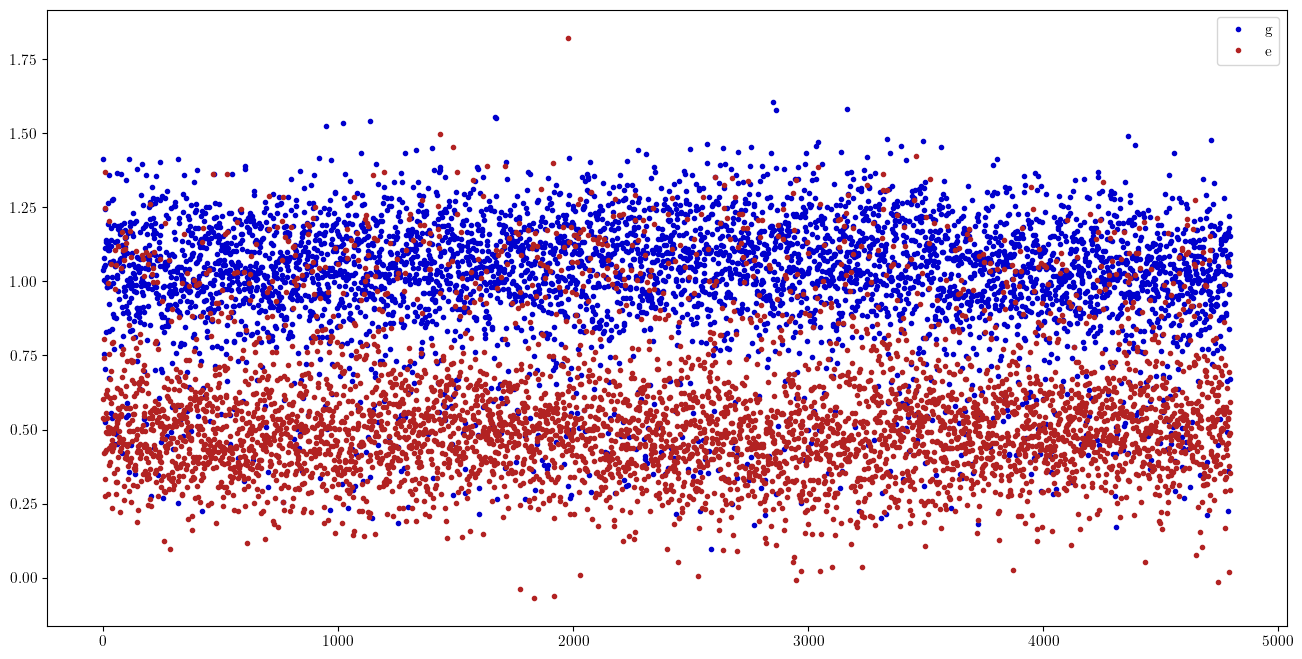

In [ ]:
# def unwrap_phase_AK(phases, offset = 0):
#     output = np.zeros(len(phases))
#     for ind in range(0, len(phases)):
#         phase = phases[ind] + offset
#         temp1 = phase
#         temp2 = phase + 2*np.pi
#         temp3 = phase -2*np.pi
#         temp4 = phase + 4*np.pi
#         temp5 = phase -4*np.pi

#         vec = [temp1, temp2, temp3,temp4, temp5]
#         ind2 = np.argmin(np.abs(vec))

#         output[ind] = vec[ind2]-offset
#     return output


# # # input = phi_0_g - phi_plus_g
# # # new_phases =  unwrap_phase_AK(input, offset = 0)

# # # input = phi_minus_g + phi_plus_g
# # # new_phases =  unwrap_phase_AK(input, offset = 0)

# # input = ddphi_g
# # new_phases =  unwrap_phase_AK(input, offset = 1*np.pi)

# # input = ddphi_e
# # new_phases =  unwrap_phase_AK(input, offset = -0.9*np.pi)


# # # input = np.linspace(0, 5*np.pi, 200)
# # # new_phases =  unwrap_phase_AK(input, offset = 0)

# # fig = plt.figure()
# # plt.clf()
# # ax = plt.subplot(1,1,1)
# # plt.plot(input/np.pi, color = 'k', linestyle = '', marker = '.')
# # plt.plot(new_phases/np.pi, color = 'deepskyblue', linestyle = '', marker = '.')

# # fig.set_size_inches([16,8])
# # plt.show()



# input = ddphi_g
# new_phases_g =  unwrap_phase_AK(input, offset = 1*np.pi)

# input = ddphi_e
# new_phases_e =  unwrap_phase_AK(input, offset = -0.9*np.pi)


# fig = plt.figure()
# plt.clf()
# ax = plt.subplot(1,1,1)
# plt.plot(new_phases_g/np.pi+2, color = gcolor, linestyle = '', marker = '.', label = 'g')
# plt.plot(new_phases_e/np.pi, color = ecolor, linestyle = '', marker = '.', label = 'e')
# ax.legend()

# fig.set_size_inches([16,8])
# plt.show()





